In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.chdir('/Users/Kivanc/Desktop/matplotlib/analysisdemo/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')
cwd=os.getcwd()
cwd

'/Users/Kivanc/Desktop/matplotlib/analysisdemo/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data'

In [3]:
files=os.listdir(cwd)
files

df=pd.DataFrame()
list(files)
type(files)

for file in files:
    df = df.append(pd.read_csv(file), ignore_index=True)
    
df.shape

(186850, 6)

In [4]:
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
df=df.dropna(how='all')

df['Month']=df['Order Date'].str[0:2]
df=df[df['Order Date'].str[0:2]!='Or']
df['Month']=df['Month'].astype('int32')
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [6]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=df['Price Each'].astype('float32').astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [25]:
df['Total Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700
1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600
2,295667,USB-C Charging Cable,1,11,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11
3,295668,27in FHD Monitor,1,149,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149
4,295669,USB-C Charging Cable,1,11,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11


In [48]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']=df['Purchase Address'].apply(lambda x: get_city(x)+' '+'('+get_state(x)+')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,New York City (NY)
1,295666,LG Washing Machine,1,600,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,New York City (NY)
2,295667,USB-C Charging Cable,1,11,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,New York City (NY)
3,295668,27in FHD Monitor,1,149,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,Atlanta (GA)


In [69]:
results1=df.groupby('City',as_index=False).sum()
results1

,City,Quantity Ordered,Price Each,Month,Total Sales
0,Atlanta (GA),16602,2768857,104794,2782841
1,Austin (TX),11153,1802516,69829,1811054
2,Boston (MA),22528,3622510,141112,3644327
3,Dallas (TX),16730,2741555,104620,2755117
4,Los Angeles (CA),33289,5399261,208325,5426973
5,New York City (NY),27932,4616764,175741,4642872
6,Portland (ME),2750,445363,17144,447661
7,Portland (OR),11303,1853087,70621,1862056
8,San Francisco (CA),50239,8178055,315520,8223669
9,Seattle (WA),16553,2722310,104941,2735070


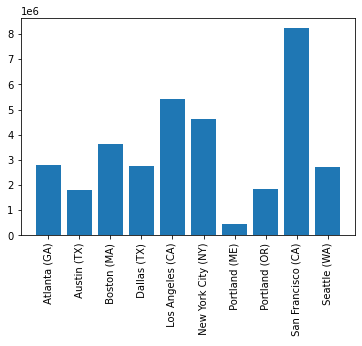

In [71]:
import matplotlib.pyplot as plt



plt.bar(results1['City'],results1['Total Sales'])
plt.xticks(cities,rotation='vertical')
plt.show()

In [24]:
results=df.groupby('Month').sum()
results


,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10903,1804577,1813956
2,13449,2179934,2191696
3,17005,2779903,2794068
4,20558,3354065,3374951
5,18667,3122775,3138287
6,15253,2551984,2566187
7,16072,2621867,2635443
8,13448,2221451,2234194
9,13109,2076254,2087435


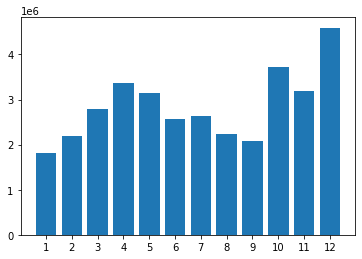

In [22]:
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months,results['Total Sales'])
plt.xticks(months)
plt.show()